<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project Initil Data Cleaning and Explorations </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

<br>
<br>
<br>


### Camilo Salazar <br> BrainStation <br> October 21, 2023

---
# Introduction

In this notebook, we embark on a crucial initial phase that involves both data cleaning and exploration. Our primary goal is to ensure that the datasets we work with are in an optimal condition for analysis. To achieve this, we address issues such as missing values, duplicates, and unnecessary data, thus setting the stage for our book recommender system project. We will be building this recommender system using four key datasets:

 - **Books Data (books.csv)**: This dataset contains detailed information about 10,000 unique books, 

- **Tags Data (tags.csv)**: This dataset contains the name and id of the tags that users can attach to books

- **Book Tags Data (book_tags.csv)**: this data set includes the number of users that have added a specific tag to a book

- **Ratings Data (ratings.csv)**: contains the user id and the rating they have given to a specific book

Our journey begins with data cleaning, ensuring that our datasets are pristine and ready for exploration. Once the data is prepared, we can dive into the exploratory data analysis, unraveling valuable insights from these datasets and paving the way for the creation of our book recommender system.

In [331]:
# imports usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [332]:
#loading all dataframes
book_df = pd.read_csv('data/books.csv')
tags_df = pd.read_csv('data/tags.csv')
book_tags_df = pd.read_csv('data/book_tags.csv')
ratings_df = pd.read_csv('data/ratings.csv')

## Table of Content

- [Book Data Frame](#part-1)
- [Tags Data Frame](#part-2)
- [Book Tags Data Frame](#part-3)
- [Rating Data Frame](#part-4)


## Book Data Frame EDA <a class="anchor" id="part-1"></a>

To begin, let's start by examining the book data to understand its structure, including the shape and data types of each column. We'll also investigate whether any columns contain missing values

In [333]:
book_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [334]:
#check size
b_rown, b_coln = book_df.shape
print(f'Book Data Frame has {b_rown} rows and {b_coln} columns')

Book Data Frame has 10000 rows and 23 columns


In [335]:
# Check column name and dat type
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [336]:
# check the percent of missing values in each column
book_df.isna().sum()/b_rown *100

book_id                       0.00
goodreads_book_id             0.00
best_book_id                  0.00
work_id                       0.00
books_count                   0.00
isbn                          7.00
isbn13                        5.85
authors                       0.00
original_publication_year     0.21
original_title                5.85
title                         0.00
language_code                10.84
average_rating                0.00
ratings_count                 0.00
work_ratings_count            0.00
work_text_reviews_count       0.00
ratings_1                     0.00
ratings_2                     0.00
ratings_3                     0.00
ratings_4                     0.00
ratings_5                     0.00
image_url                     0.00
small_image_url               0.00
dtype: float64

We can observe that several columns contain missing values, with `original_title` missing approximately 5% of the data. However, it's worth noting that we already have another column, `title`, which provides the same information. As a result, it's logical to drop the `original_title` column to streamline our dataset.

Furthermore, we identify a few additional columns that contain links to images of the books. Given that these image links may not be directly relevant to our primary goal we can safely drop these columns as well.

In [337]:
# drop column with redudna t information
book_df.drop(columns=['original_title','image_url','small_image_url'],inplace = True)
book_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


Our next column with missing values is `language_code`, where just over 10% of its values are missing. I was able to find an online source that provides a complete dataset for this specific column. With this additional data source in hand, I can confidently fill in the missing values within the `language_code` column.

In [338]:
# replaces language column with a copy with the filled data
booke_df = pd.read_csv('data/books_enriched.csv', index_col=[0])
book_df.drop(columns=['language_code'],inplace = True)
book_df = pd.merge(book_df, booke_df[['book_id','language_code']] ,on ='book_id',how = 'left')
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   title                      10000 non-null  object 
 10  average_rating             10000 non-null  float64
 11  ratings_count              10000 non-null  int64  
 12  work_ratings_count         10000 non-null  int64  
 13  work_text_reviews_count    10000 non-null  int6

Our next column with missing values is `original_publication_year` which has just 21 missing values. Given this relatively small number of missing entries. By using the `goodreads_book_id`, I can access the Goodreads website to retrieve the publication year for each of these missing entries.

In [339]:
# check the info of the book with missing year
book_df[book_df['original_publication_year'].isna()][['book_id','goodreads_book_id','authors','title']]

,book_id,goodreads_book_id,authors,title
219,220,3609760,Mark Cotta Vaz,Twilight: The Complete Illustrated Movie Compa...
975,976,90072,"Robert Kapilow, Dr. Seuss","Dr. Seuss's Green Eggs and Ham: For Soprano, B..."
3505,3506,856917,Yuu Watase,"Absolute Boyfriend, Vol. 1"
4228,4229,36,"Chris Smith, Christopher Lee, Richard Taylor",The Lord of the Rings: Weapons and Warfare
4247,4248,8724779,"P.C. Cast, Kristin Cast",Marked / Betrayed / Chosen / Untamed / Hunted ...
4409,4410,349254,Jude Fisher,The Lord of the Rings: The Return of the King:...
4707,4708,9832370,BookRags,BookRags Summary: A Storm of Swords
4770,4771,5171894,James Rollins,"The Doomsday Key (Sigma Force, #6)"
4877,4878,17733861,Bella Forrest,"A Shade of Blood (A Shade of Vampire, #2)"
5609,5610,1044141,Stephen R. Covey,The 8th Habit: From Effectiveness to Greatness


In [340]:
# manually adding the missing year
book_df.loc[219,'original_publication_year'] = 2008
book_df.loc[975,'original_publication_year'] = 1996
book_df.loc[3505,'original_publication_year'] = 2003
book_df.loc[4228,'original_publication_year'] = 2003
book_df.loc[4247,'original_publication_year'] = 2009
book_df.loc[4409,'original_publication_year'] = 2003
book_df.loc[4707,'original_publication_year'] = 2010
book_df.loc[4770,'original_publication_year'] = 2009
book_df.loc[4877,'original_publication_year'] = 2013
book_df.loc[5609,'original_publication_year'] = 2004
book_df.loc[5871,'original_publication_year'] = 1858
book_df.loc[6428,'original_publication_year'] = 2006
book_df.loc[7190,'original_publication_year'] = 2010
book_df.loc[7215,'original_publication_year'] = 1982
book_df.loc[7416,'original_publication_year'] = 2012
book_df.loc[7645,'original_publication_year'] = 2000
book_df.loc[8476,'original_publication_year'] = 1974
book_df.loc[9196,'original_publication_year'] = 1939
book_df.loc[9510,'original_publication_year'] = 2009
book_df.loc[9533,'original_publication_year'] = 2007
book_df.loc[9928,'original_publication_year'] = 2009

# checking for no missing values
book_df['original_publication_year'].isna().sum()

0

Our last two columns with missing values are `isbn` and `isbn13`, with approximately 7% and 5% of their values missing, respectively. These columns provide unique codes assigned to each book, with 'isbn13' essentially incorporating an additional three digits at the beginning of the old 'isbn' code. The substantial amount of missing values in both columns makes manual filling impractical. Fortunately, we already possess other identifiers that we can utilize to identify the books via the Goodreads website. As such, we can drop both of these columns.

In [341]:
#drop missing columns
book_df.drop(columns=['isbn13','isbn'],inplace = True)
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   authors                    10000 non-null  object 
 6   original_publication_year  10000 non-null  float64
 7   title                      10000 non-null  object 
 8   average_rating             10000 non-null  float64
 9   ratings_count              10000 non-null  int64  
 10  work_ratings_count         10000 non-null  int64  
 11  work_text_reviews_count    10000 non-null  int64  
 12  ratings_1                  10000 non-null  int64  
 13  ratings_2                  10000 non-null  int6

With all null values addressed, we can now proceed to the final step, which involves checking for duplicates before transitioning to the exploratory phase.

In [342]:
book_df.duplicated().sum()

0

In [343]:
# checking the clean dataset
book_df.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,authors,original_publication_year,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,language_code
0,1,2767052,2767052,2792775,272,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,eng
1,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,eng
2,3,41865,41865,3212258,226,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,eng
3,4,2657,2657,3275794,487,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,eng
4,5,4671,4671,245494,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,eng


With the data cleaning phase successfully completed, including the verification of the absence of duplicate rows, we can now transition to the exploration phase. We'll begin by examining the distribution of `original_publication_year`

In [344]:
book_df['original_publication_year'].describe()

count    10000.000000
mean      1982.011900
std        152.425492
min      -1750.000000
25%       1990.000000
50%       2004.000000
75%       2011.000000
max       2017.000000
Name: original_publication_year, dtype: float64

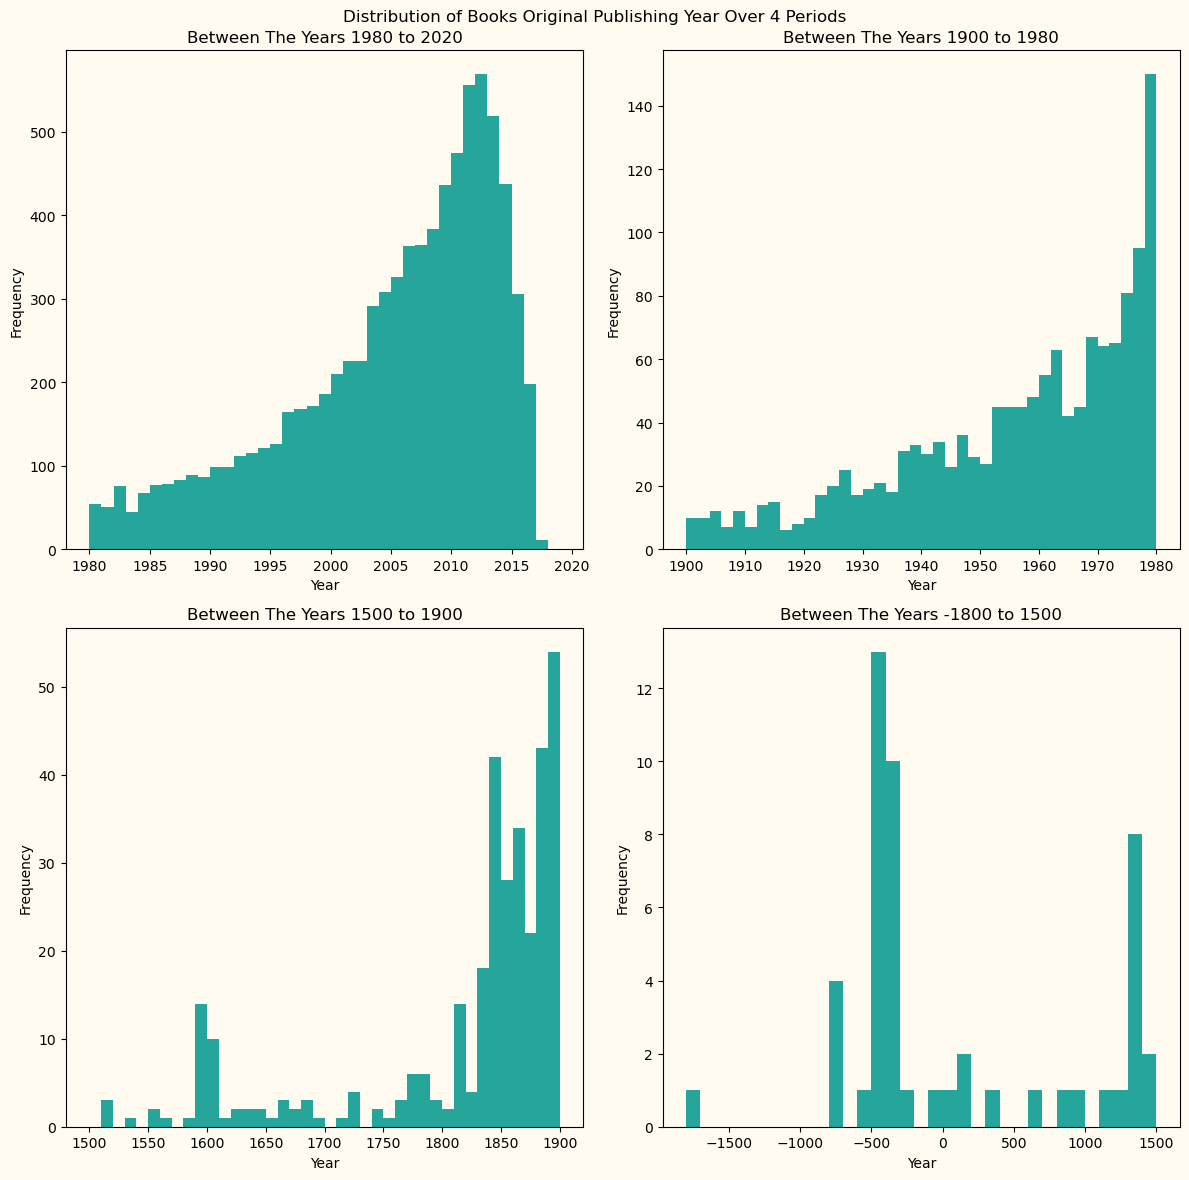

In [345]:
# plot distribution of published year by 4 separate periods

plt.subplots(2,2,figsize = (12,12),facecolor = "#fffbf0")


ax = plt.subplot(2,2,1)
ax.set_facecolor("#fffbf0")
plt.hist(book_df['original_publication_year'],bins = range(1980,2020,1),color = '#26a69a')
plt.title('Between The Years 1980 to 2020')
plt.ylabel('Frequency')
plt.xlabel('Year')

ax = plt.subplot(2,2,2)
ax.set_facecolor("#fffbf0")
plt.hist(book_df['original_publication_year'],bins = range(1900,1982,2),color = '#26a69a')
plt.title('Between The Years 1900 to 1980')
plt.ylabel('Frequency')
plt.xlabel('Year')

ax = plt.subplot(2,2,3)
ax.set_facecolor("#fffbf0")
plt.hist(book_df['original_publication_year'],bins = range(1500,1910,10),color = '#26a69a')
plt.title('Between The Years 1500 to 1900')
plt.ylabel('Frequency')
plt.xlabel('Year')

ax = plt.subplot(2,2,4)
ax.set_facecolor("#fffbf0")
plt.hist(book_df['original_publication_year'],bins = range(-1800,1600,100),color = '#26a69a')
plt.title('Between The Years -1800 to 1500')
plt.ylabel('Frequency')
plt.xlabel('Year')


plt.suptitle('Distribution of Books Original Publishing Year Over 4 Periods')
plt.tight_layout()
plt.show()

Due to the extensive range of publication years in our dataset, spanning from as early as 1750 BC to as recently as 2017 AD, we've divided the books into four distinct periods to facilitate a more visually informative analysis. This division allows us to observe that most books in our dataset were written between 1980 AD and 2017 AD. We can see a steady decline in the number of books as we move backward in time, with a noticeable drop in the 1800s. This decline continues as books become scarcer, to the point that only a handful of books can be found before 1500 AD, which are particularly sparse and widely dispersed.

In [346]:
# exploring the author column
print(f" The average number of book an author published is {np.round(book_df['authors'].value_counts().to_frame('Number_of_Books').mean()[0],4)}")

book_df['authors'].value_counts().to_frame('Number_of_Books').head(10)

 The average number of book an author published is 2.1441


,Number_of_Books
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39
Meg Cabot,37
James Patterson,36
David Baldacci,34
J.D. Robb,33
John Grisham,33


Looking at the `authors` in our dataset, it becomes evident that Stephen King stands out with 60 published books, which far exceeds the approximate average of 2.14 books per author in our dataset. However, his works only account for 0.6% of the total books in the dataset, indicating the presence of a diverse array of authors. 

As we continue our exploration, we'll dive into the `average rating`, which represents the average of all the ratings users give, ranging from 1 to 5. Our approach begins with examining the top 10 books and their respective authors with the highest average ratings. Conversely, we'll also investigate the top 10 books with the lowest ratings. Following this, we'll shift our focus to analyzing the distribution of `average rating` across the data.

In [347]:
# top 10 highest rate books
book_df[['title','authors','average_rating']].sort_values(['average_rating'],ascending = False).head(10)

,title,authors,average_rating
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",4.77
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77
8853,Mark of the Lion Trilogy,Francine Rivers,4.76
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73


In [348]:
# top 10 worst rated books
book_df[['title','authors','average_rating']].sort_values(['average_rating']).head(10)

,title,authors,average_rating
1792,One Night at the Call Center,Chetan Bhagat,2.47
3549,The Almost Moon,Alice Sebold,2.67
8006,The Finkler Question,Howard Jacobson,2.76
9020,Lost,"Gregory Maguire, Douglas Smith",2.80
4008,Four Blondes,Candace Bushnell,2.80
8165,Among the Ten Thousand Things,Julia Pierpont,2.84
8873,Tell-All,Chuck Palahniuk,2.84
4282,Revenge Wears Prada: The Devil Returns (The De...,Lauren Weisberger,2.84
4613,The Emperor's Children,Claire Messud,2.93
8959,The Red House,Mark Haddon,2.93


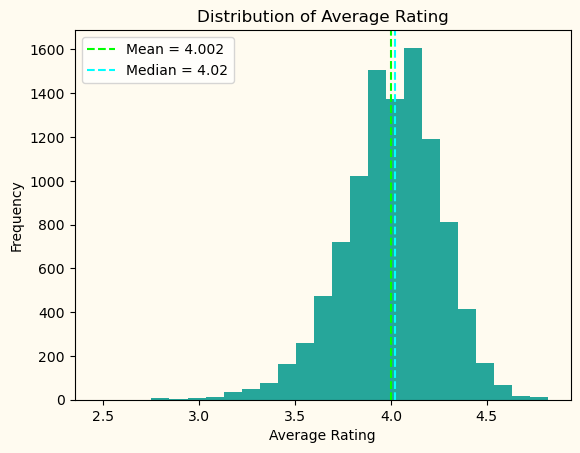

In [349]:
# plooting average rating distribution
plt.figure(facecolor='#fffbf0')
ax = plt.axes()
ax.set_facecolor("#fffbf0")
plt.hist(book_df['average_rating'],bins=25,color = '#26a69a')
plt.axvline(book_df['average_rating'].mean(),ls = '--',color = 'lime', label = f"Mean = {np.round(book_df['average_rating'].mean(),3)}")
plt.axvline(book_df['average_rating'].median(),ls = '--',color = 'cyan', label = f'Median = {book_df["average_rating"].median()}')
plt.legend(loc = 'upper left')
plt.title('Distribution of Average Rating')
plt.ylabel('Frequency')
plt.xlabel('Average Rating')
plt.show()

Exploring the distribution of average ratings reveals that the majority of books tend to have an average rating centered around 4.0. While the majority falls within the 3.5 to 4.5 range, a smaller number of books receive ratings below 3.5 or above 4.5.

Next, we will explore the distribution of the number of specific ratings each book receives. However, before graphing this data, we need to normalize it. The reason for normalization is that the number of ratings a book gets can vary significantly, making a direct comparison challenging. To overcome this, we'll calculate the proportion of each specific rating a book gets by dividing it by its total number of ratings.

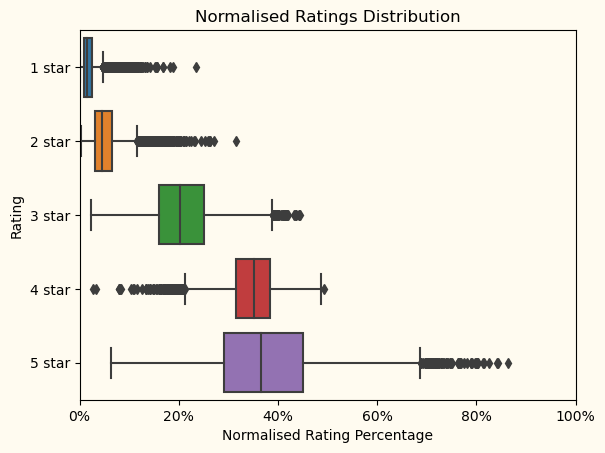

Normalised Rating Percentage                    
                               mean median   min    max
rating                                                 
1 star                         1.95   1.56  0.08  23.55
2 star                         5.26   4.57  0.24  31.51
3 star                        20.72  20.21  2.31  44.51
4 star                        34.76  35.17  2.64  49.35
5 star                        37.31  36.64  6.25  86.37

In [350]:
# creating new data frame combining all rating into 1 columns and normaling them to better plot

book_box_pd = pd.DataFrame([])
for i in range(1,6):
    x = pd.DataFrame([])
    x['Normalised Rating Percentage'] = book_df[f'ratings_{i}']/book_df['work_ratings_count']
    x['rating'] = f'{i} star'
    book_box_pd = pd.concat([book_box_pd,x])
    
# ploting distribution of normalised rating distribution
plt.figure(facecolor='#fffbf0')
ax = plt.axes()
ax.set_facecolor("#fffbf0")
sns.boxplot(y = book_box_pd['rating'], x= book_box_pd['Normalised Rating Percentage'] )
plt.title('Normalised Ratings Distribution')
plt.ylabel('Rating')
plt.xlabel('Normalised Rating Percentage')
plt.xlim(0,1)
plt.xticks([0,0.2,0.4,0.6,0.8,1],['0%','20%','40%','60%','80%','100%'])
plt.show()

# print data of the aggregated group
np.round(book_box_pd.groupby('rating').agg(['mean','median','min','max'])*100,2)

Upon analyzing the distribution of each of the five ratings, it becomes evident that they differ significantly. Ratings of 1 and 2 stars exhibit a concentrated distribution, with median values of under 5%. In contrast, 3-star ratings have more spread-out distribution, boasting a higher median of 20%. The higher ratings of 4 and 5 stars share similar median values, hovering around 36%, yet their distribution patterns significantly differ. While 4-star ratings are more concentrated, 5-star ratings display the greatest spread, ranging from as low as 6% to as high as 86%. These findings offer a comprehensive view of the diverse ways readers rate books.

---

## Tags Data Frame   <a class="anchor" id="part-2"></a>

The Tags DataFrame primarily consists of unique tag IDs and their corresponding names, offering limited data for exploration. However, its actual value lies in its role as a reference for identifying tag names in the Book Tags dataset, which we'll delve into next.

In [351]:
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [352]:
#check size
t_rown, t_coln = tags_df.shape
print(f'Tags Data Frame has {t_rown} rows and {t_coln} columns')

Tags Data Frame has 34252 rows and 2 columns


In [353]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [354]:
tags_df.isna().sum()

tag_id      0
tag_name    0
dtype: int64

In [355]:
tags_df.duplicated().sum()

0

---
## Book Tags Data Frame <a class="anchor" id="part-3"></a>

The Book Tags DataFrame includes data about the number of users who have assigned specific tags to particular books. This dataset is valuable as it allows us to compare books that share many of the same tags. 

In [356]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [357]:
#check size
bt_rown, bt_coln = book_tags_df.shape
print(f'Book Tags Data Frame has {bt_rown} rows and {bt_coln} columns')

Book Tags Data Frame has 999912 rows and 3 columns


In [358]:
book_tags_df.isna().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [359]:
book_tags_df.duplicated().sum()

6

We identified six duplicate rows in our dataset, representing an extremely small fraction, accounting for just 0.0006% of our data. Consequently, we can confidently remove these six rows and explore the dataset.

In [360]:
book_tags_df.drop_duplicates(inplace=True)
book_tags_df.duplicated().sum()

0

In the exploration phase, we begin by examining the number of tags assigned to each book. We find that a staggering 99.94% of the books have precisely 100 tags. Only a small number deviate from this trend, with six books having fewer tags, and the lowest count being 56 tags.

In [361]:
#group by books id to find how many tags are assigned to the book and then groups by count to find the number of books with certain number of tags
book_tags_df.groupby('goodreads_book_id').count().groupby('count').count()

,tag_id
count,
56,1
62,1
94,1
96,1
99,2
100,9994


Following our exploration we can delve into the popularity of tags by examining the percentage of our 10,000 books that contain each tag. Using the information from the previous tags DataFrame, we'll incorporate it into our data to identify the top 10 most popular tags. Subsequently, we'll explore the distribution of all tags across the dataset.

In [363]:
# adding tags name 
book_tags_df2 = pd.merge(book_tags_df, tags_df, on = 'tag_id', how = 'left')

popul_tags = book_tags_df2['tag_name'].value_counts()/book_df.shape[0]*100

popul_tags.head(10)

to-read              99.83
favorites            98.81
owned                98.58
books-i-own          97.99
currently-reading    97.76
library              94.15
owned-books          92.21
fiction              90.97
to-buy               86.92
kindle               83.16
Name: tag_name, dtype: float64

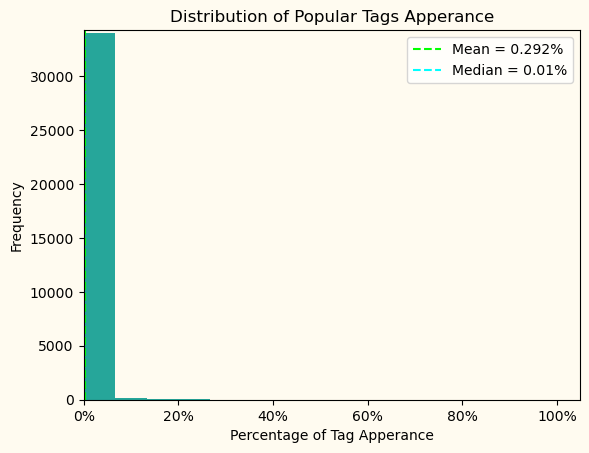

In [394]:

plt.figure(facecolor='#fffbf0')
ax = plt.axes()
ax.set_facecolor("#fffbf0")
plt.title('Distribution of Tag Apperance Percentage')
plt.hist(popul_tags,bins =15,color = '#26a69a')
plt.xticks([0,20,40,60,80,100],['0%','20%','40%','60%','80%','100%'])
plt.xlim(0)
plt.ylabel('Frequency')
plt.xlabel('Percentage of Tag Apperance')
plt.axvline(popul_tags.mean(),ls = '--',color = 'lime', label = f"Mean = {np.round(popul_tags.mean(),3)}%")
plt.axvline(popul_tags.median(),ls = '--',color = 'cyan', label = f"Median = {popul_tags.median()}%")
plt.legend()
plt.ylim(0,34252)
plt.show()

Analyzing the distribution of tags, we observe that astonishingly, over 50% of our tags are associated with only one of our books. On average, a tag tends to appear on approximately 29 books. This implies that tags are far more unique than we initially expected. As a result, we may need to consider narrowing down the number of tags we use when building a recommender model, particularly if we opt for a content-based or hybrid recommender. This ensures that our recommendations are more targeted and relevant to readers' specific interests.

---
## Ratings Data Frame <a class="anchor" id="part-4"></a>

Moving to our last DataFrame, we have the 'ratings' dataset, which contains user ratings for each book on a scale from 1 to 5.

In [365]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [366]:
#check size
r_rown, r_coln = ratings_df.shape
print(f'Rating Data Frame has {r_rown} rows and {r_coln} columns')

Rating Data Frame has 5976479 rows and 3 columns


In [367]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [368]:
ratings_df.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [369]:
ratings_df.duplicated().sum()

0

The data appears to be clean, allowing us to proceed to the exploratory phase. We'll begin by examining the percentage of books with ratings and the number of unique users in our dataset.

In [370]:
print(f"{ratings_df['book_id'].unique().size/b_rown*100}% of books have ratings")
print(f"{ratings_df['user_id'].unique().size} Users have given ratings")

100.0% of books have ratings
53424 Users have given ratings


Now, let's explore the distribution of user ratings, ranging from 1 to 5.

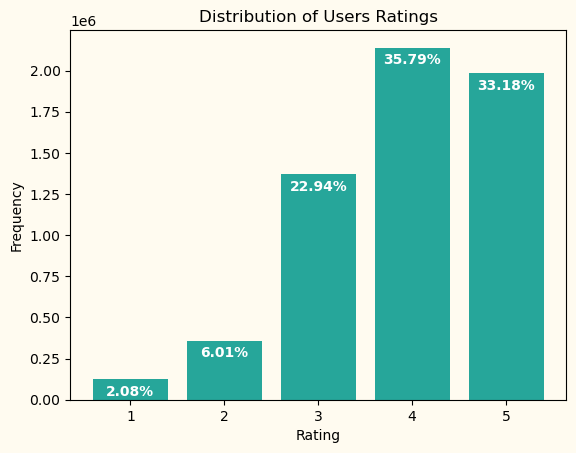

In [376]:
rat_cnt = ratings_df['rating'].value_counts().sort_index(ascending = False)

plt.figure(facecolor='#fffbf0')
ax = plt.axes()
ax.set_facecolor("#fffbf0")
plt.bar(rat_cnt.index,rat_cnt.values, color = '#26a69a')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Users Ratings')
for i in range(5):
    pos = rat_cnt.values[i]-100000
    pct = np.round(rat_cnt.values[i]/ratings_df.shape[0]*100,2)
    plt.text(5-i, pos, f'{pct}%', ha = 'center',color = 'white',weight="bold")
plt.savefig('ratings_dis.png')
plt.show()


Examining this distribution, we observe that ratings of 4 and 5 are the most prevalent, together accounting for just over two-thirds of the total ratings. In contrast, ratings of 1 are the least common, making up only approximately 2% of the user ratings. This distribution indicates a positive bias in our data, which is an essential factor to consider as we develop our recommendation model.

Next, let's explore the distribution of the amounts of books that each user rates.

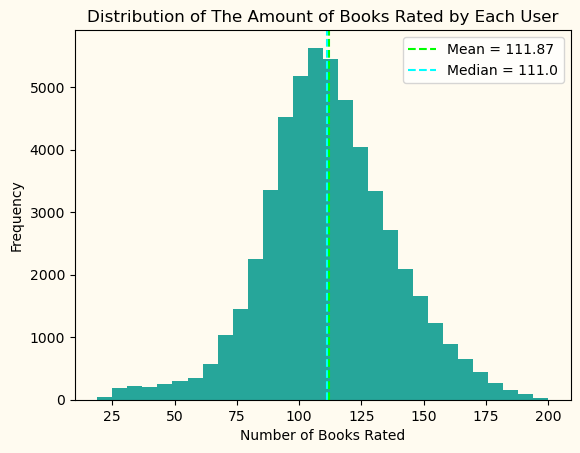

In [400]:
user_agg = ratings_df.groupby(['user_id'])[['rating']].agg(['count', 'mean', 'median'])['rating']

plt.figure(facecolor='#fffbf0')
ax = plt.axes()
ax.set_facecolor("#fffbf0")
plt.title('Distribution of The Amount of Books Rated by Each User')
plt.xlabel('Number of Books Rated')
plt.ylabel('Frequency')
plt.hist(user_agg['count'], bins = 30,color = '#26a69a')
plt.axvline(user_agg['count'].mean(),ls = '--',color = 'lime', label = f"Mean = {np.round(user_agg['count'].mean(),2)}")
plt.axvline(user_agg['count'].median(),ls = '--',color = 'cyan', label = f"Median = {user_agg['count'].median()}")
plt.legend()
#plt.savefig('books_dis.png')
plt.show()

Exploring the distribution of the number of books that users rate, we notice that it exhibits a relatively normal distribution, with a peak centered at around 111 books rated by each user. This suggests that, on average, users tend to rate around 1.11% of the available books in our dataset.

Lastly, we can examine the inverse of this scenario by looking at the distribution of the number of users each book receives

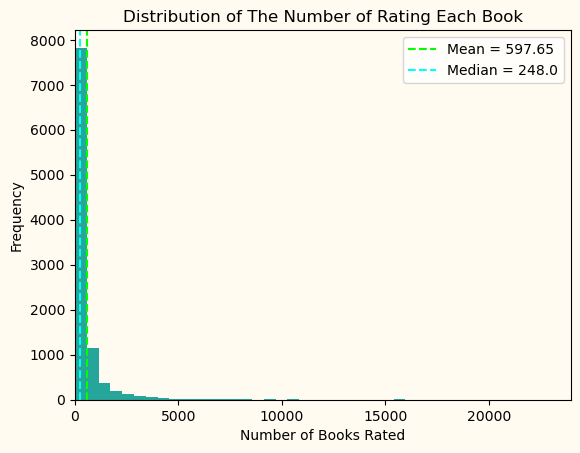

In [401]:
num_rates = ratings_df[['book_id','user_id']].groupby('book_id').count()

plt.figure(facecolor='#fffbf0')
ax = plt.axes()
ax.set_facecolor("#fffbf0")
plt.title('Distribution of The Number of Rating Each Book')
plt.xlabel('Number of User Ratings')
plt.ylabel('Frequency')
plt.hist(num_rates['user_id'], bins = 40,color = '#26a69a')
plt.axvline(num_rates['user_id'].mean(),ls = '--',color = 'lime', label = f"Mean = {np.round(num_rates['user_id'].mean(),2)}")
plt.axvline(num_rates['user_id'].median(),ls = '--',color = 'cyan', label = f"Median = {num_rates['user_id'].median()}")
plt.legend()
plt.xlim(0)
plt.show()

Examining this distribution, we observe a substantial spread, with some books receiving over 10,000 user recommendations. However, most books receive just around a few hundred user recommendations, highlighting the diversity in user engagement. On average, each book garners approximately 600 user ratings. This information provides insights into the varying levels of popularity and user interactions with the books in our dataset.

---

###  Conclusion

Our exploration and initial data analysis have provided valuable insights into the diverse landscape of our four datasets. We've addressed data quality concerns, uncovered vital statistics, and gained a deeper understanding of the distribution of user interactions with books. These findings lay a solid foundation for our next phases, including data processing, feature engineering, and creating a baseline recommendation model. As we move forward, we will leverage these insights to craft a robust book recommender system that caters to a wide range of user preferences. 